In [ ]:
!pip install Sastrawi
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_ver

In [ ]:
!pip install --upgrade gensim
!pip install --force-reinstall numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 38.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
bigframes 2.4.0 requires numpy>=1.24

In [ ]:
!pip install numpy==1.23.5

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
factory = StemmerFactory()
stemmer = factory.create_stemmer()
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from gensim.models import Word2Vec, FastText

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7ce6c8589620>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/cty

DATA COLLECTION

In [ ]:
df = pd.read_csv('/content/PRDECT-ID Dataset.csv')
text = df['Customer Review']
labels = df['Emotion']

# Display the first few rows of the dataset
df.head()

,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Review,Customer Rating,Customer Review,Sentiment,Emotion
0,Computers and Laptops,Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...,Jakarta Utara,53500,4.9,5449,2369,5,Alhamdulillah berfungsi dengan baik. Packaging...,Positive,Happy
1,Computers and Laptops,PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...,Kota Tangerang Selatan,72000,4.9,2359,1044,5,"barang bagus dan respon cepat, harga bersaing ...",Positive,Happy
2,Computers and Laptops,SSD Midasforce 128 Gb - Tanpa Caddy,Jakarta Barat,213000,5.0,12300,3573,5,"barang bagus, berfungsi dengan baik, seler ram...",Positive,Happy
3,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,bagus sesuai harapan penjual nya juga ramah. t...,Positive,Happy
4,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Positive,Happy


PREPROCESSING DATA

In [ ]:
# Cek missing value
print("\n=== Cek Missing Value ===")
print(df.isnull().sum())

# Cek duplikat
print("\n=== Cek Duplikat ===")
print(f"Jumlah duplikat: {df.duplicated().sum()}")

# hapus missing value dan duplikat jika ada
df = df.dropna()
df = df.drop_duplicates()

print(f"Setelah dibersihkan: {df.shape[0]} baris data")


=== Cek Missing Value ===
Category           0
Product Name       0
Location           0
Price              0
Overall Rating     0
Number Sold        0
Total Review       0
Customer Rating    0
Customer Review    0
Sentiment          0
Emotion            0
dtype: int64

=== Cek Duplikat ===
Jumlah duplikat: 7
Setelah dibersihkan: 5393 baris data


In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove URLs
    text = re.sub(r'\@[\w]+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabet characters
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return " ".join(tokens)

# Clean the text data
df['cleaned_text'] = df['Customer Review'].astype(str).apply(clean_text)
tokenized_text = [text.split() for text in df['cleaned_text']]

EXPLORATORY DATA ANALYSIS (EDA)

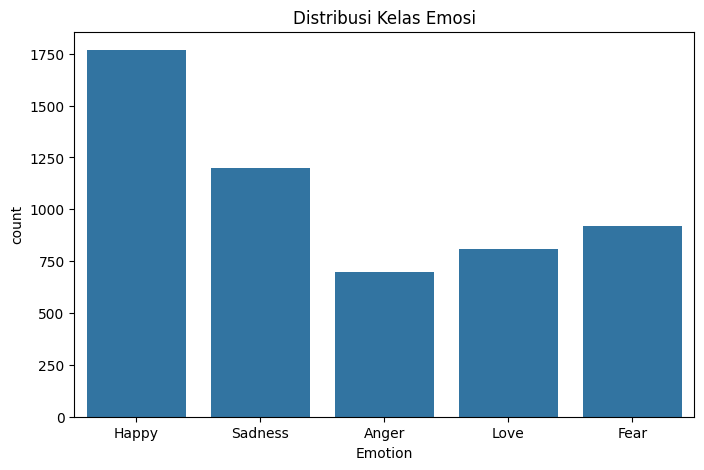

In [ ]:
# Distribusi kelas
plt.figure(figsize=(8,5))
sns.countplot(x='Emotion', data=df)  # Ganti 'label' menjadi 'Emotion'
plt.title("Distribusi Kelas Emosi")
plt.show()

In [ ]:
# Pastikan teks tidak kosong
df = df[df['cleaned_text'].astype(bool)]

# Reset index setelah filter
df = df.reset_index(drop=True)

# Lanjutkan TF-IDF
texts = df['cleaned_text'].astype(str).tolist()
labels = df['Emotion'].tolist()


In [ ]:
import numpy as np
import pickle

# Load teks
texts = df['cleaned_text'].astype(str).tolist()

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_vectorized = vectorizer.fit_transform(texts)

# Simpan TF-IDF dan vectorizer
with open('X_vectorized.pkl', 'wb') as f:
    pickle.dump(X_vectorized, f)

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

# Pastikan 'labels' sudah tersedia
print("Distribusi sebelum SMOTE:", Counter(labels))

# Split data (SMOTE hanya pada training set)
X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized, labels, test_size=0.2, random_state=42, stratify=labels
)

# Terapkan SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Simpan hasil SMOTE
with open('X_train_balanced.pkl', 'wb') as f:
    pickle.dump(X_train_balanced, f)
with open('y_train_balanced.pkl', 'wb') as f:
    pickle.dump(y_train_balanced, f)

print("Distribusi sesudah SMOTE:", Counter(y_train_balanced))


Distribusi sebelum SMOTE: Counter({'Happy': 1767, 'Sadness': 1201, 'Fear': 917, 'Love': 808, 'Anger': 698})
Distribusi sesudah SMOTE: Counter({'Anger': 1413, 'Fear': 1413, 'Sadness': 1413, 'Happy': 1413, 'Love': 1413})


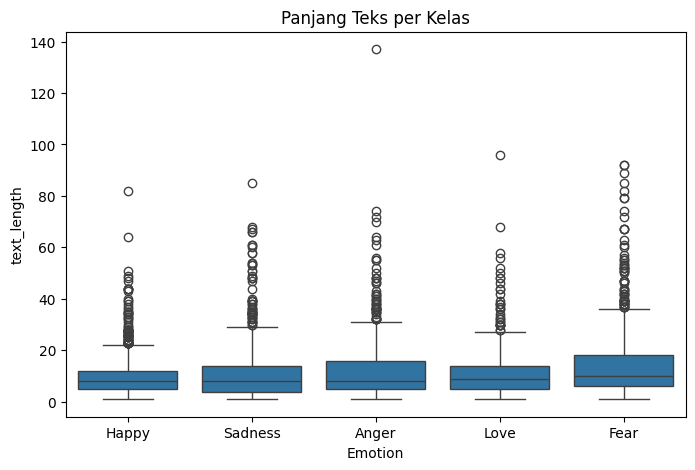

In [ ]:
# Panjang teks
df['text_length'] = df['cleaned_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8,5))
sns.boxplot(x='Emotion', y='text_length', data=df)  # Ganti 'label' menjadi 'Emotion'
plt.title("Panjang Teks per Kelas")
plt.show()

In [ ]:
df['text_length'] = df['cleaned_text'].apply(lambda x: len(x.split()))
print(df['text_length'].describe())

count    5391.000000
mean       11.107216
std        10.048177
min         1.000000
25%         5.000000
50%         8.000000
75%        14.000000
max       137.000000
Name: text_length, dtype: float64


In [ ]:
import numpy as np
import pandas as pd

# Asumsikan df sudah tersedia dengan kolom 'cleaned_text'
tokenized_texts = [text.split() for text in df['cleaned_text'].astype(str)]

# Buat kamus kata ke index
word2idx = {'<PAD>': 0, '<OOV>': 1}
for text in tokenized_texts:
    for word in text:
        if word not in word2idx:
            word2idx[word] = len(word2idx)

# Ubah teks jadi angka
sequences = [[word2idx.get(word, 1) for word in text] for text in tokenized_texts]

# Padding/truncating manual
max_len = 137
padded_sequences = np.array([
    seq[:max_len] + [0]*(max_len - len(seq)) if len(seq) < max_len else seq[:max_len]
    for seq in sequences
])

# Simpan hasil padding
np.save('padded_sequences.npy', padded_sequences)

# Simpan word2idx dictionary
import pickle
with open('word2idx.pkl', 'wb') as f:
    pickle.dump(word2idx, f)

print(f"Padding selesai. Shape: {padded_sequences.shape}")


Padding selesai. Shape: (5391, 137)


In [ ]:
# Kata unik per kelas
for label in df['Emotion'].unique():  # Ganti 'labels' menjadi 'Emotion'
    subset = df[df['Emotion'] == label]  # Ganti 'labels' menjadi 'Emotion'
    words = ' '.join(subset['cleaned_text']).split()
    unique_words = set(words)
    print(f"{label}: {len(unique_words)} kata unik")

Happy: 3095 kata unik
Sadness: 3528 kata unik
Anger: 2617 kata unik
Love: 2332 kata unik
Fear: 3450 kata unik


FEATURE EXTRACTION & PCA

In [ ]:
# Tokenisasi untuk Word2Vec & FastText
tokenized_text = [text.split() for text in df['cleaned_text']]

In [ ]:
# TF-IDF
print("\n=== TF-IDF ===")
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'].astype(str))
print(f"Jumlah fitur sebelum PCA (TF-IDF): {X_tfidf.shape[1]}")

# Simpan TF-IDF dan vectorizer
with open('X_tfidf.pkl', 'wb') as f:
    pickle.dump(X_tfidf, f)

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

# PCA
pca_tfidf = PCA(n_components=0.95)
X_tfidf_pca = pca_tfidf.fit_transform(X_tfidf.toarray())
print(f"Jumlah fitur setelah PCA (TF-IDF): {X_tfidf_pca.shape[1]}")

# Simpan hasil PCA
np.save('X_tfidf_pca.npy', X_tfidf_pca)
with open('pca_tfidf_model.pkl', 'wb') as f:
    pickle.dump(pca_tfidf, f)



=== TF-IDF ===
Jumlah fitur sebelum PCA (TF-IDF): 5000
Jumlah fitur setelah PCA (TF-IDF): 2119


In [ ]:
# BoW
print("\n=== Bag of Words ===")
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(df['cleaned_text'].astype(str))
print(f"Jumlah fitur sebelum PCA (BoW): {X_bow.shape[1]}")

# Simpan hasil BoW dan vectorizer
with open('X_bow.pkl', 'wb') as f:
    pickle.dump(X_bow, f)

with open('bow_vectorizer.pkl', 'wb') as f:
    pickle.dump(bow_vectorizer, f)

# PCA
pca_bow = PCA(n_components=0.95)
X_bow_pca = pca_bow.fit_transform(X_bow.toarray())
print(f"Jumlah fitur setelah PCA (BoW): {X_bow_pca.shape[1]}")

# Simpan hasil PCA
np.save('X_bow_pca.npy', X_bow_pca)
with open('pca_bow_model.pkl', 'wb') as f:
    pickle.dump(pca_bow, f)



=== Bag of Words ===
Jumlah fitur sebelum PCA (BoW): 5000
Jumlah fitur setelah PCA (BoW): 1380


In [ ]:
# Word2Vec
print("\n=== Word2Vec ===")
w2v_model = Word2Vec(
    sentences=tokenized_text, vector_size=100, window=5,
    min_count=1, workers=4, sg=1  # sg=1 means skip-gram
)

# Simpan model Word2Vec
w2v_model.save("word2vec_model.model")

# Buat vektor rata-rata untuk tiap dokumen
X_w2v = np.array([
    np.mean(
        [w2v_model.wv[word] for word in words if word in w2v_model.wv]
        or [np.zeros(w2v_model.vector_size)], axis=0
    )
    for words in tokenized_text
])

# Simpan X_w2v
np.save('X_w2v.npy', X_w2v)

# PCA
print(f"Jumlah fitur sebelum PCA (Word2Vec): {X_w2v.shape[1]}")
pca_w2v = PCA(n_components=0.95)
X_w2v_pca = pca_w2v.fit_transform(X_w2v)
print(f"Jumlah fitur setelah PCA (Word2Vec): {X_w2v_pca.shape[1]}")

# Simpan hasil PCA
np.save('X_w2v_pca.npy', X_w2v_pca)
with open('pca_w2v_model.pkl', 'wb') as f:
    pickle.dump(pca_w2v, f)



=== Word2Vec ===
Jumlah fitur sebelum PCA (Word2Vec): 100
Jumlah fitur setelah PCA (Word2Vec): 4


In [ ]:
# FastText
print("\n=== FastText ===")
ft_model = FastText(
    sentences=tokenized_text, vector_size=100, window=5,
    min_count=1, workers=4, sg=1  # sg=1 berarti skip-gram
)

# Simpan model FastText
ft_model.save("fasttext_model.model")

# Buat vektor rata-rata untuk setiap dokumen
X_ft = np.array([
    np.mean(
        [ft_model.wv[word] for word in words if word in ft_model.wv]
        or [np.zeros(ft_model.vector_size)], axis=0
    )
    for words in tokenized_text
])

# Simpan vektor FastText
np.save('X_fasttext.npy', X_ft)

# PCA
print(f"Jumlah fitur sebelum PCA (FastText): {X_ft.shape[1]}")
pca_ft = PCA(n_components=0.95)
X_ft_pca = pca_ft.fit_transform(X_ft)
print(f"Jumlah fitur setelah PCA (FastText): {X_ft_pca.shape[1]}")

# Simpan hasil PCA
np.save('X_fasttext_pca.npy', X_ft_pca)
with open('pca_fasttext_model.pkl', 'wb') as f:
    pickle.dump(pca_ft, f)



=== FastText ===
Jumlah fitur sebelum PCA (FastText): 100
Jumlah fitur setelah PCA (FastText): 4


In [ ]:
import numpy as np

# Load hasil PCA dari masing-masing metode
X_tfidf_pca = np.load('X_tfidf_pca.npy')
X_bow_pca = np.load('X_bow_pca.npy')
X_w2v_pca = np.load('X_w2v_pca.npy')
X_ft_pca = np.load('X_fasttext_pca.npy')

# Gabungkan semua fitur menjadi satu matriks
X_combined = np.concatenate([X_tfidf_pca, X_bow_pca, X_w2v_pca, X_ft_pca], axis=1)

# Tampilkan informasi dimensi
print(f"Jumlah total fitur gabungan: {X_combined.shape[1]}")

# Simpan fitur gabungan
np.save('X_combined_features.npy', X_combined)

import pickle

with open('X_combined_features.pkl', 'wb') as f:
    pickle.dump(X_combined, f)

Jumlah total fitur gabungan: 3507


MODEL TRAINING & EVALUATION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

def train_and_evaluate(X, y, label):
    print(f"\n=== Evaluasi untuk {label} ===")

    # Split data menjadi train, validation, dan test
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Inisialisasi dan latih model SVM linear
    model = SVC(kernel='linear', random_state=42)
    model.fit(X_train, y_train)

    # Prediksi dan evaluasi
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"Akurasi {label}: {acc:.4f}")
    print(classification_report(y_test, y_pred, zero_division=0))

    return acc

# Target label
y = df['Emotion']

# Load fitur gabungan
X_combined = np.load('X_combined_features.npy')

# Evaluasi model berdasarkan fitur gabungan
acc_combined = train_and_evaluate(X_combined, y, 'Gabungan (TF-IDF + BoW + Word2Vec + FastText)')


=== Evaluasi untuk Gabungan (TF-IDF + BoW + Word2Vec + FastText) ===
Akurasi Gabungan (TF-IDF + BoW + Word2Vec + FastText): 0.5593
              precision    recall  f1-score   support

       Anger       0.37      0.40      0.38        72
        Fear       0.35      0.38      0.36        77
       Happy       0.72      0.79      0.75       189
        Love       0.59      0.55      0.57        93
     Sadness       0.52      0.40      0.45       109

    accuracy                           0.56       540
   macro avg       0.51      0.50      0.50       540
weighted avg       0.56      0.56      0.56       540



In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
import numpy as np

def train_and_evaluate_cv(X, y, label, cv_splits=5):
    print(f"\n=== Evaluasi Cross-Validation untuk {label} ({cv_splits}-Fold StratifiedKFold) ===")

    skf = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)
    model = SVC(kernel='linear', random_state=42)

    # Akurasi rata-rata berdasarkan cross_val_score
    scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
    print(f"Akurasi Rata-rata {label}: {scores.mean():.4f} (+/- {scores.std():.4f})")

    # Evaluasi detail berdasarkan cross_val_predict
    y_pred = cross_val_predict(model, X, y, cv=skf)
    print("\nClassification Report (Rata-rata hasil CV):")
    print(classification_report(y, y_pred, zero_division=0))

    return scores.mean()

# Target label
y = df['Emotion']

# Load fitur gabungan hasil sebelumnya
X_combined = np.load('X_combined_features.npy')

# Evaluasi model menggunakan fitur gabungan
acc_combined = train_and_evaluate_cv(X_combined, y, 'Gabungan (TF-IDF + BoW + Word2Vec + FastText)')


=== Evaluasi Cross-Validation untuk Gabungan (TF-IDF + BoW + Word2Vec + FastText) (5-Fold StratifiedKFold) ===
Akurasi Rata-rata Gabungan (TF-IDF + BoW + Word2Vec + FastText): 0.5791 (+/- 0.0082)

Classification Report (Rata-rata hasil CV):
              precision    recall  f1-score   support

       Anger       0.39      0.46      0.42       698
        Fear       0.41      0.39      0.40       917
       Happy       0.73      0.78      0.75      1767
        Love       0.61      0.57      0.59       808
     Sadness       0.58      0.51      0.54      1201

    accuracy                           0.58      5391
   macro avg       0.54      0.54      0.54      5391
weighted avg       0.58      0.58      0.58      5391

